# Clustering-Yolcu ve uçuş sayısına göre Kümeleme

In [33]:
#KMeans: En yakın komşu kümelemesi

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
#pembe uyarıları kapatmak için
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [35]:
df=pd.read_csv("air-traffic-passenger-statistics.csv")

In [36]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [37]:
from sklearn.cluster import KMeans            #en yakın komşu demek,verilerin benzerliklerine göre en yakın komşusınu buluyor,vektöre çevirip en yakın uzaklıkları bularak çalışıyor
from sklearn.metrics import silhouette_score  #KMeans in başarı oranını hesaplayan kod


In [38]:
x=df[['Activity Period','Passenger Count','Operating Airline']]

#aktivite periodu, yolcu sayısı ve haavvyolu şirketine göre kümeleme yapacağız

In [39]:
x.head()

,Activity Period,Passenger Count,Operating Airline
0,200507,27271,ATA Airlines
1,200507,29131,ATA Airlines
2,200507,5415,ATA Airlines
3,200507,35156,Air Canada
4,200507,34090,Air Canada


In [8]:
df.corr()

,Activity Period,Passenger Count
Activity Period,1.000000,0.050677
Passenger Count,0.050677,1.000000


In [9]:
df.describe()

,Activity Period,Passenger Count
count,18885.000000,18885.000000
mean,201179.285994,29876.744400
std,385.755460,60626.072969
min,200507.000000,1.000000
25%,200811.000000,5352.000000
50%,201204.000000,9170.000000
75%,201509.000000,20718.000000
max,201806.000000,659837.000000


In [10]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [40]:
df.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count'],
      dtype='object')

In [41]:
x=pd.get_dummies(x,drop_first=True)

#sözel verileri sayısal veriye çevirdik

In [42]:
x.head()

,Activity Period,Passenger Count,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,...,Operating Airline_United Airlines,Operating Airline_United Airlines - Pre 07/01/2013,Operating Airline_Virgin America,Operating Airline_Virgin Atlantic,Operating Airline_Volaris Airlines,Operating Airline_WOW Air,Operating Airline_WestJet Airlines,Operating Airline_World Airways,Operating Airline_XL Airways France,Operating Airline_Xtra Airways
0,200507,27271,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200507,29131,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,200507,5415,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,200507,35156,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,200507,34090,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


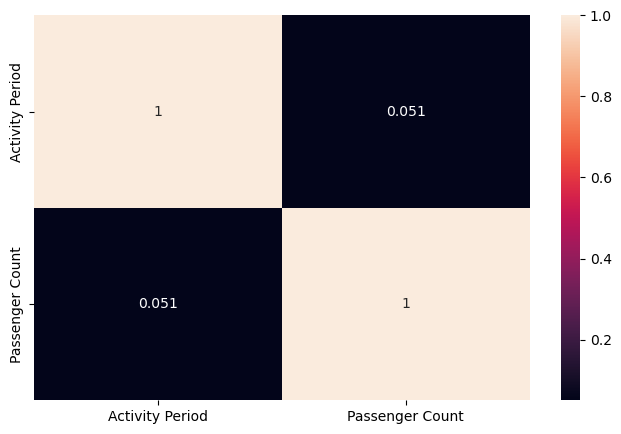

In [43]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True);

In [44]:
ucus_sayısı = df["Operating Airline"].value_counts() 
#Hava yolu şirketlerinin kaç defa uçuş yaptıkları

In [45]:
ucan_yolcusayısı=df.groupby(df["Operating Airline"]).sum()["Passenger Count"].sort_values(ascending=False) 
#Hava yolu şirketleri ile uçan yolcu sayısı

In [46]:
list_group=pd.DataFrame(ucan_yolcusayısı)
list_group.head(10)

#son 3 satırdaki kodra için (githup mduruer) den yardım alındı

,Passenger Count
Operating Airline,
United Airlines,112640408
United Airlines - Pre 07/01/2013,105363917
SkyWest Airlines,44582356
American Airlines,43622387
Virgin America,37843920
Delta Air Lines,34813833
Southwest Airlines,33414970
Alaska Airlines,17540235
US Airways,16816616


Text(0.5, 1.0, 'Hava yolu şirketlerinin taşıdığı yolcu sayıları')

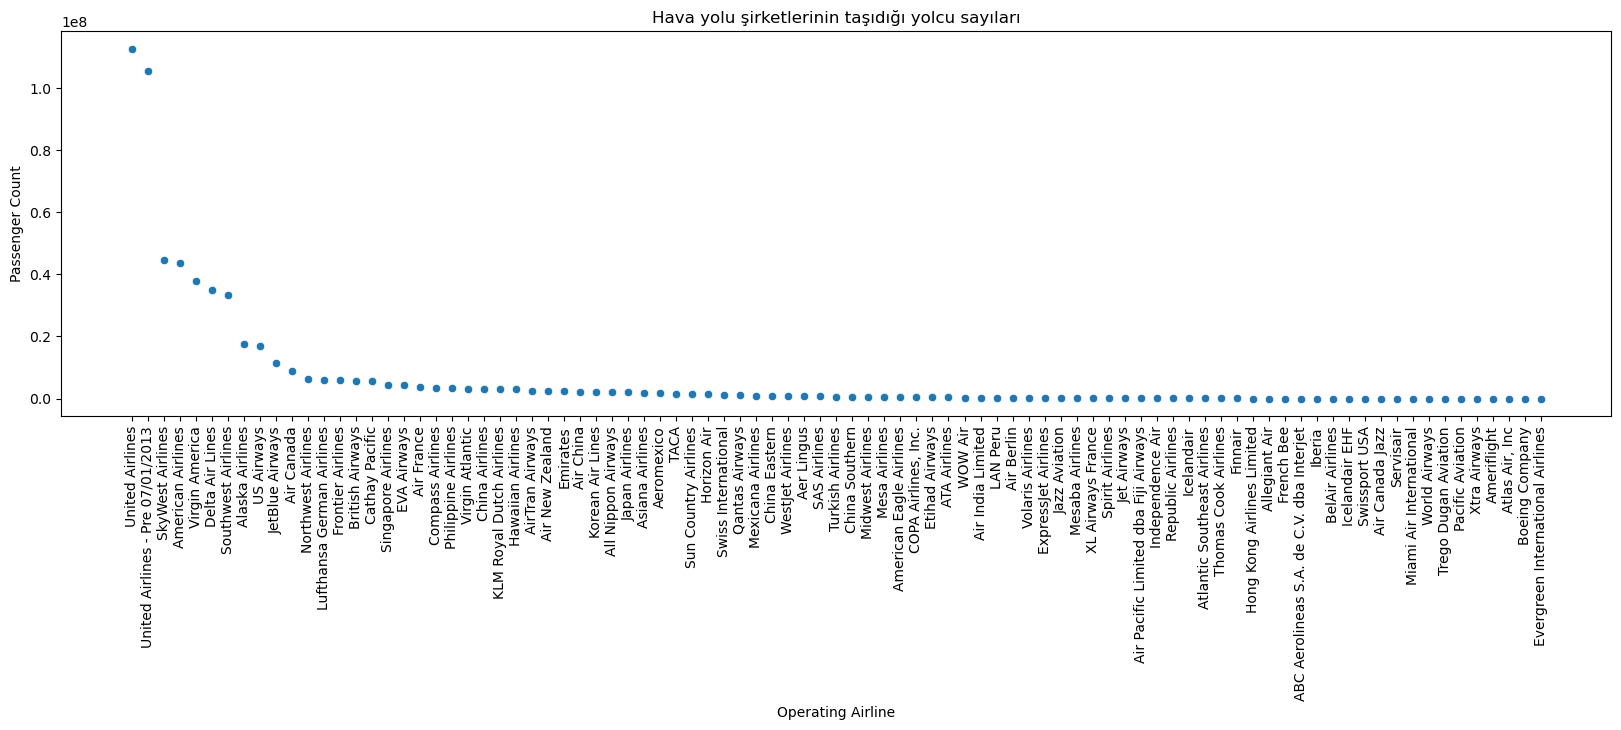

In [47]:
plt.figure(figsize=(20,5))
sns.scatterplot(x="Operating Airline",y="Passenger Count",data=list_group)
plt.xticks(rotation=90);
plt.title("Hava yolu şirketlerinin taşıdığı yolcu sayıları")

In [48]:
model=KMeans(4) #benzerliklerine göre 4 gruba ayıracağımızı tahmin ediyoruz

In [49]:
model=model.fit(x)      #sadece x var y yok Clustering özelliği bu ,fit ile model öğrendi 

In [50]:
tahmin=model.predict(x)        

In [51]:
tahmin

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
silhouette_score(x,tahmin)

# silhouette_score fonksiyonu, veri noktalarının kümelenme içindeki benzerliklerini değerlendirir
# -1 ile 1 arasında bir değer alır. Pozitif değerler, veri noktasının doğru kümeye ait olduğunu, negatif değerler ise yanlış kümeye ait olduğunu gösterir
#1'e yakın değerler, verinin iyi bir şekilde kümelenmiş olduğunu, 0'a yakın değerler ise verinin üst üste bindiğini veya hatalı bir şekilde kümelenmiş olduğunu gösterir

0.7852585462492334

In [ ]:
# Feature Engineering - Verinin aslında olmayan ancak veriden yararlanıp üretilen sütun işlemine denir - Öznitelik Mühendisliği

In [66]:
x=df[['Activity Period','Passenger Count','Operating Airline']]

In [69]:
df["Activity Month"]=df["Activity Period"].astype(str).str[4:]
df["Activity Year"]=df["Activity Period"].astype(str).str[:4]
df["Activity Month"]=df["Activity Month"].astype(int)
df["Activity Year"]=df["Activity Year"].astype(int)
del df["Activity Period"]

#"Activity Period" yerine  "Activity Year"  "Activity Month" diye iki sütun oluşturup sildik

In [70]:
x=df[["Activity Year","Activity Month","Passenger Count"]]

In [71]:
x['cluster']=tahmin  #x in içnde yeni bir sütun açıp 'cluster' diye isimlendiriyoruz

In [72]:
x.head()

,Activity Year,Activity Month,Passenger Count,cluster
0,2005,7,27271,0
1,2005,7,29131,0
2,2005,7,5415,0
3,2005,7,35156,3
4,2005,7,34090,0


In [75]:
#Hava yolu şirketleri ile yıllara göre uçan yolcu sayısı
airline_passenger_count_of_year=df.groupby(df["Activity Year"]).sum()["Passenger Count"].sort_values(ascending=False) 

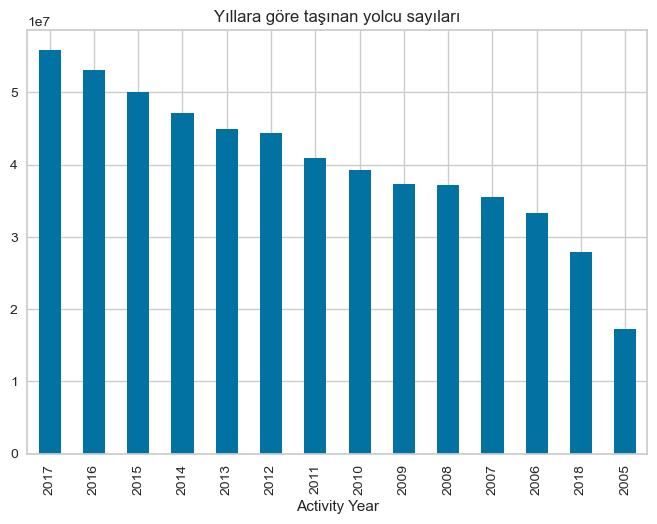

In [76]:
airline_passenger_count_of_year.plot.bar()
plt.title("Yıllara göre taşınan yolcu sayıları");

#son iki kod (github enes-asan) dan yardım alınarak yapıldı

In [55]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

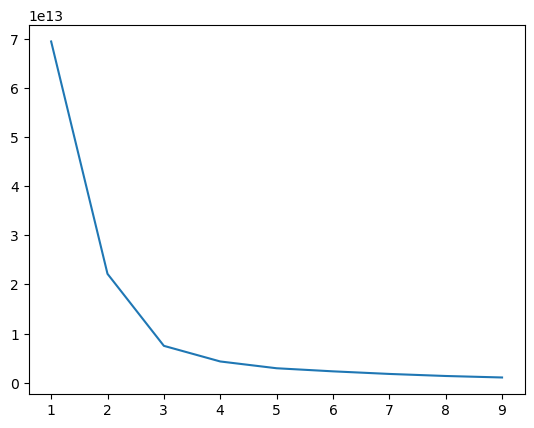

In [56]:
plt.plot(range(1,10),wcss)
#elbow dirsek metodu

In [57]:
#pip install yellowbrick

In [58]:
from yellowbrick.cluster import KElbowVisualizer

In [59]:
km=KMeans()

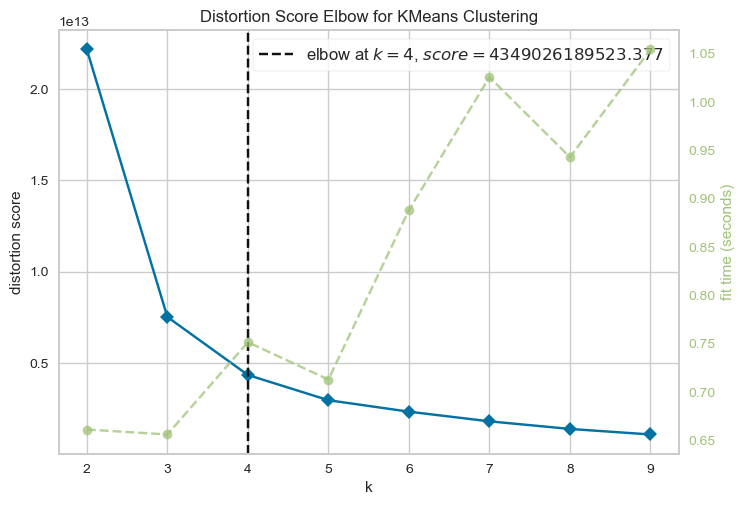

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
visualizer=KElbowVisualizer(km,k=(2,10))
visualizer.fit(x)
visualizer.show()
# 4 gruba ayırmann en ideal olduğunu gösteren grafiği çıkarıyor

# Hierarchical Clustering- Hiyerarşi-ikinci bir gruplama 

In [61]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [62]:
data=linkage(x,method='ward',metric='euclidean')

#ward = en optimimu bulmaya yarıyor hatayı minimize ediyor
#euclidean = uzaklıkları ölçmeye yarıyor

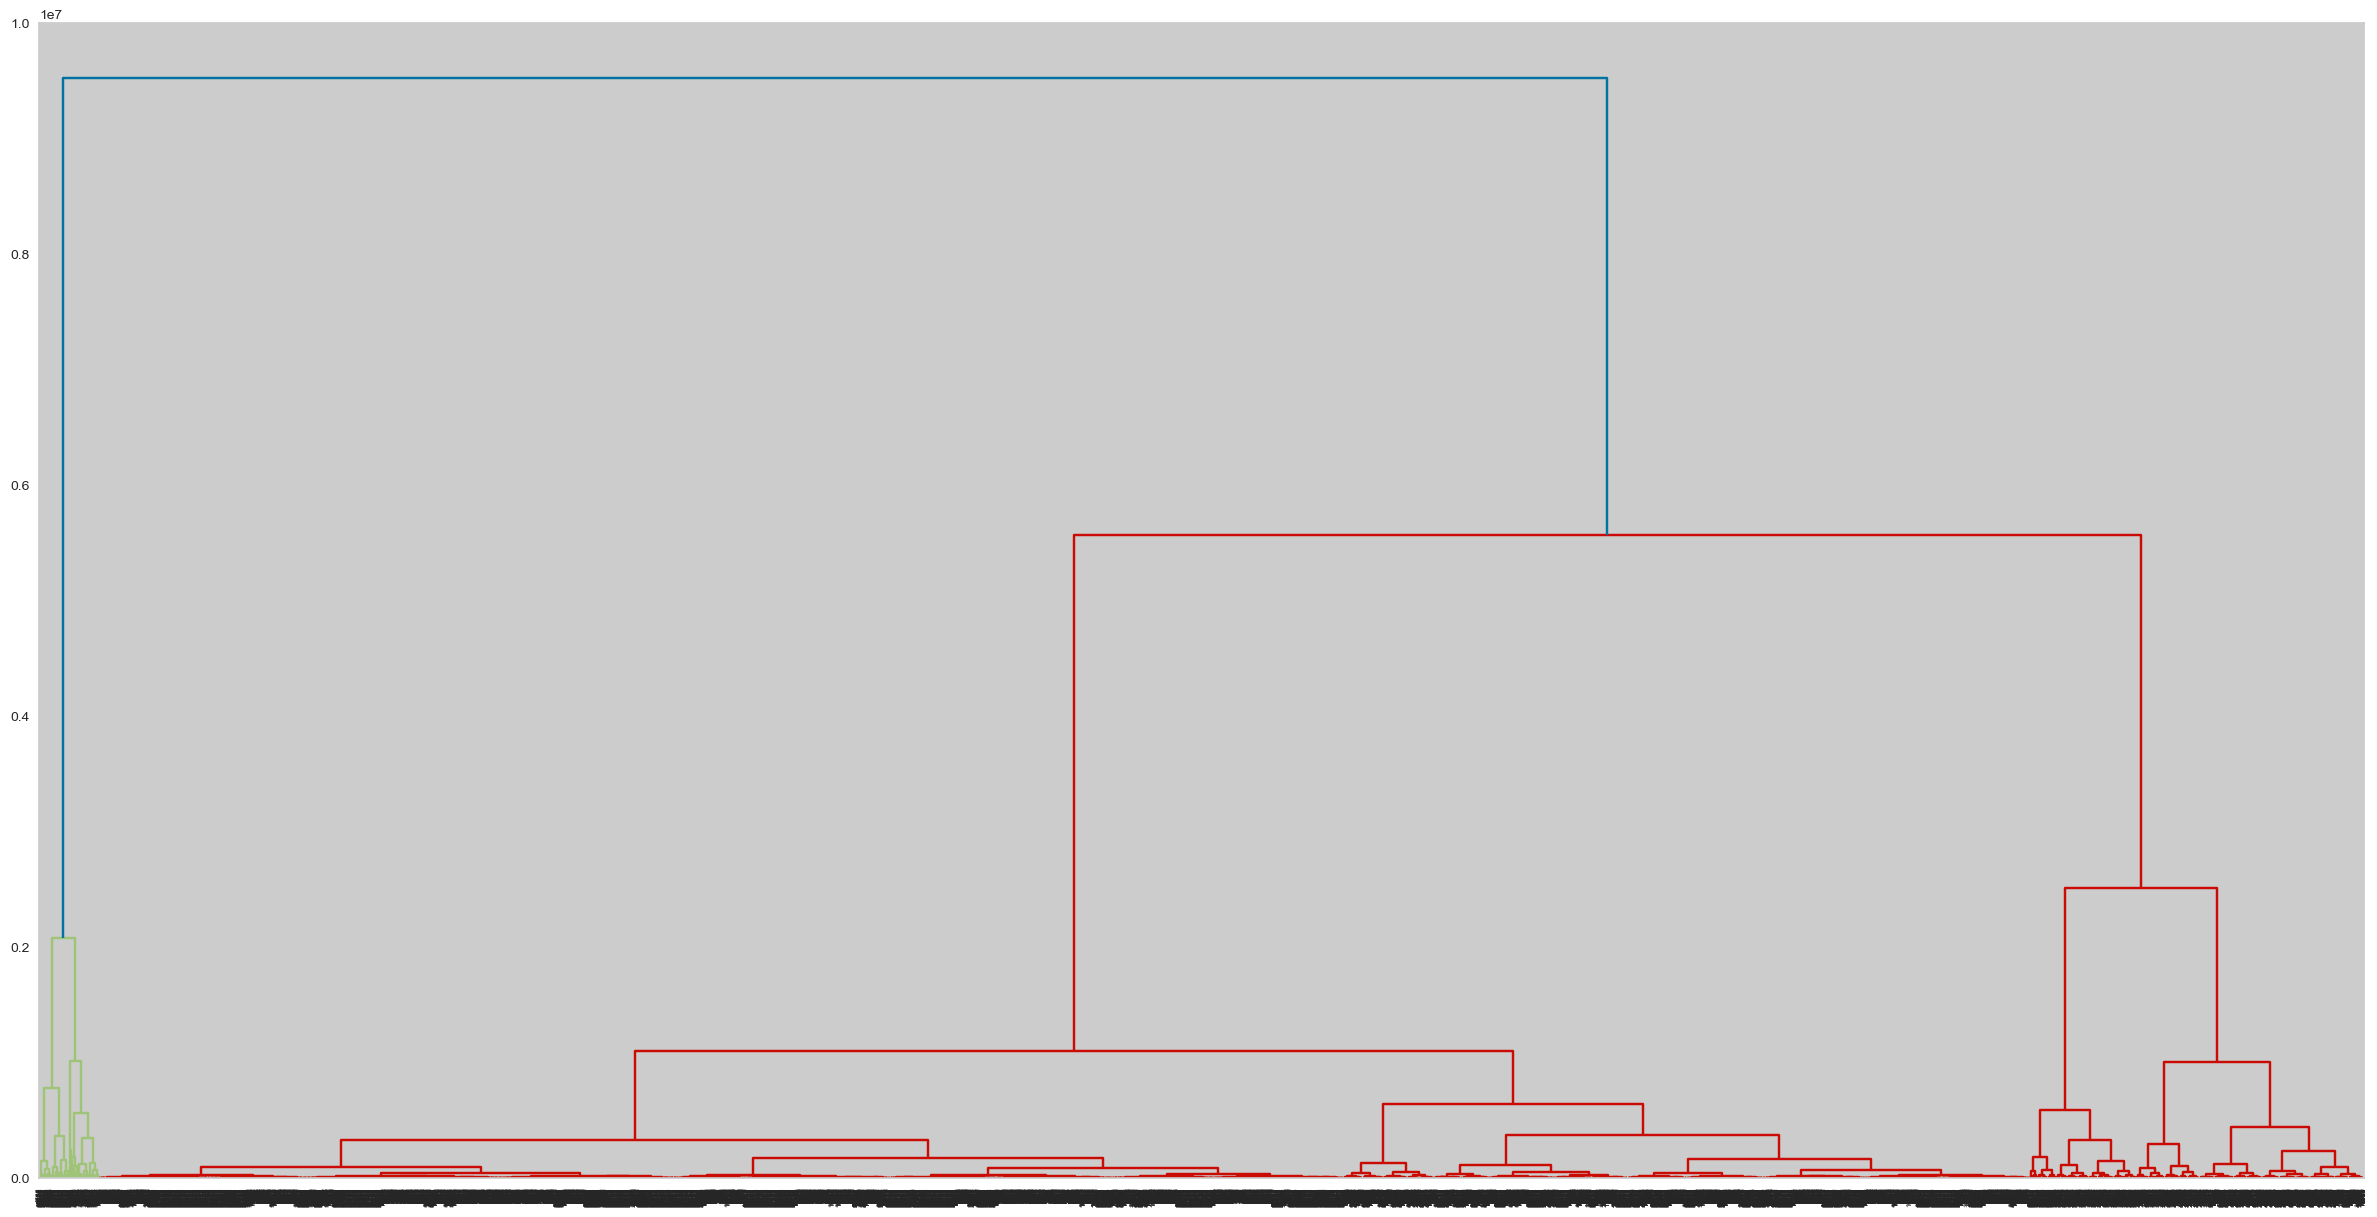

In [65]:
plt.figure(figsize=(30,15))
dendrogram(data)
plt.show()